# Activity Analysis
In this notebook we'll do some analysis of the Google "ActivitySegments" data using pandas. We'll plot our results using Matplotlib.

In [30]:
%matplotlib inline
import pandas as pd

In [40]:
# Set this to the name of your activities file
ACTIVITIES_PATH = 'activities.csv'
# Optional: configure the start and end dates of data you want to consider, e.g. date(2020, 1, 1)
START_DATE = None
END_DATE = None
# Optional: configure whether to exclude data that is low confidence
EXCLUDE_LOW_CONFIDENCE = True

In [41]:
activities = pd.read_csv(ACTIVITIES_PATH, sep='|', encoding='utf-8', parse_dates=['start_timestamp', 'end_timestamp'])

# Filter out rows that don't match the configured settings
if START_DATE:
    activities = activities[activities['start_timestamp'].dt.date >= START_DATE]
if END_DATE:
    activities = activities[activities['end_timestamp'].dt.date <= END_DATE]
if EXCLUDE_LOW_CONFIDENCE:
    activities = activities[activities['confidence'] != 'LOW']

print(f'Data has {activities.shape[0]} rows and {activities.shape[1]} columns')
activities.info()

Data has 2473 rows and 10 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2745
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   start_lat_e7     2473 non-null   int64              
 1   start_lon_e7     2473 non-null   int64              
 2   end_lat_e7       2473 non-null   int64              
 3   end_lon_e7       2473 non-null   int64              
 4   start_timestamp  2473 non-null   datetime64[ns, UTC]
 5   end_timestamp    2473 non-null   datetime64[ns, UTC]
 6   distance         2470 non-null   float64            
 7   activity_type    2473 non-null   object             
 8   confidence       2473 non-null   object             
 9   travel_distance  2437 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(2), int64(4), object(2)
memory usage: 212.5+ KB


In [33]:
# See what the first few rows of data look like
activities.head()

,start_lat_e7,start_lon_e7,end_lat_e7,end_lon_e7,start_timestamp,end_timestamp,distance,activity_type,confidence,travel_distance
0,423941900,-711423034,424628359,-712394941,2020-02-29 21:29:18.718000+00:00,2020-02-29 21:43:16+00:00,16228.0,IN_PASSENGER_VEHICLE,HIGH,17336.343582
1,424625171,-712394748,424465691,-712345327,2020-06-15 19:15:01.393000+00:00,2020-06-15 19:33:27.865000+00:00,1819.0,IN_PASSENGER_VEHICLE,MEDIUM,2335.875677
2,424469119,-712348917,424624109,-712493704,2020-06-15 21:25:47.776000+00:00,2020-06-15 21:29:48.845000+00:00,2093.0,IN_PASSENGER_VEHICLE,HIGH,2851.761028
3,424656105,-712131751,424609243,-711637293,2020-06-20 18:38:19.681000+00:00,2020-06-20 18:48:09.499000+00:00,NaN,IN_PASSENGER_VEHICLE,HIGH,4353.524412
4,424609821,-711636176,424607915,-712214341,2020-06-20 20:04:03.594000+00:00,2020-06-20 20:12:22.757000+00:00,5142.0,IN_PASSENGER_VEHICLE,HIGH,8032.899733


In [34]:
print('Number of records, by level of confidence')
activities['confidence'].value_counts()

Number of records, by level of confidence


HIGH      2167
MEDIUM     306
LOW        273
Name: confidence, dtype: int64

In [35]:
print('Number of records per activity type:')
num_records = activities['activity_type'].value_counts()
num_records

Number of records per activity type:


WALKING                  1587
CYCLING                   489
IN_PASSENGER_VEHICLE      280
IN_TRAIN                  192
IN_TRAM                    84
IN_BUS                     40
IN_SUBWAY                  28
RUNNING                    19
UNKNOWN_ACTIVITY_TYPE      19
FLYING                      7
MOTORCYCLING                1
Name: activity_type, dtype: int64

In [36]:
print('Total distance traveled by activity type (km):')
distance = activities.groupby('activity_type')['travel_distance'].sum() / 1000
distance.sort_values(inplace=True)
distance

Total distance traveled by activity type (km):


activity_type
MOTORCYCLING                 5.893817
RUNNING                     35.192988
IN_SUBWAY                  226.433304
IN_TRAM                    231.863310
CYCLING                   1203.518533
WALKING                   1599.552146
IN_BUS                    3897.438208
IN_PASSENGER_VEHICLE      7887.288409
FLYING                   10989.981219
UNKNOWN_ACTIVITY_TYPE    13384.307635
IN_TRAIN                 17027.939458
Name: travel_distance, dtype: float64

Text(0, 0.5, '')

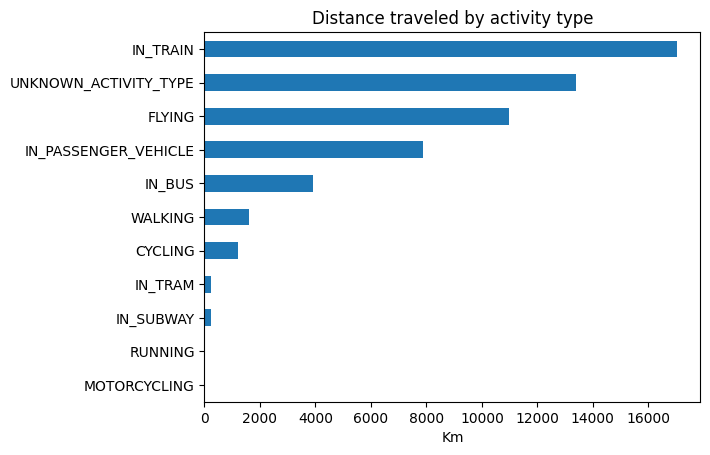

In [37]:
# Plot travel distance, by activity type
ax = distance.plot.barh()
ax.set_title('Distance traveled by activity type')
ax.set_xlabel('Km')
ax.set_ylabel('')

In [38]:
# Calculate total travel time by activity type *in hours*
print('Total time spent traveling by activity type (hours):')
activities['duration'] = activities['end_timestamp'] - activities['start_timestamp']
time_spent = activities.groupby('activity_type')['duration'].sum().dt.total_seconds() / 3600
time_spent.sort_values(inplace=True)
time_spent

Total time spent traveling by activity type (hours):


activity_type
MOTORCYCLING               0.311338
IN_SUBWAY                 10.711113
IN_TRAM                   22.054648
RUNNING                   22.816709
FLYING                    58.738277
UNKNOWN_ACTIVITY_TYPE     66.033230
IN_BUS                    72.313195
CYCLING                  155.252575
IN_PASSENGER_VEHICLE     217.185568
IN_TRAIN                 244.836919
WALKING                  473.278386
Name: duration, dtype: float64

Text(0, 0.5, '')

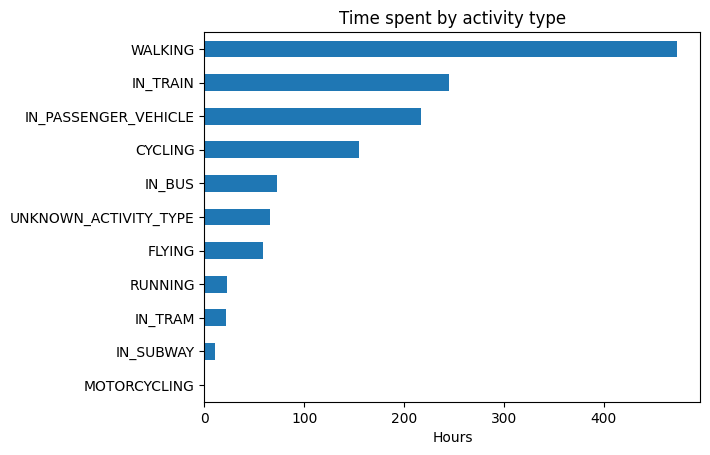

In [39]:
# Plot travel time, by activity type
ax = time_spent.plot.barh()
ax.set_title('Time spent by activity type')
ax.set_xlabel('Hours')
ax.set_ylabel('')